In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

sns.set()

### Problem 4

We consider a self-coupled excitatory network subject to the 'anti-BCM' plasticity rule. In a neural network we have a network firing rate $v$ and self-coupling weight $w$. Our system of differential equations is given below:
$$
\frac{dv}{dt}=-v+wv,\;\;\;\frac{dw}{dt}=\gamma(1-v)v,\;\;\;\gamma>0
$$

### a).
Looking at our system of ODEs above we can infer quite a lot about the dynamics of this learning rule just from examining the terms neurobiologically. 

Looking at the v-equation first we can see that the $-v$ term indicates a control the network has over runaway dynamics. As it only makes sense for the firing rate ($v$) to be non-negative (i.e $v\geq0$) $-v$ represents a decay term. In the absence of self-coupling ($w=0$) the network firing rate will decay back to a baseline $0$. With self-coupling this term will then just keep the firing rate from exploding as it is proportional to the firing rate but negative. The $wv$ term indicates that the network effects its own firing rate through the self-coupling $w$. Specifically, this means the network is connected to itself and has its firing rate altered by the self-coupling weight and the firing rate. Again because $v\geq0$ the direction of change is dependent on the self-coupling rate. If $w>0$ then the firing rate will increase (excitatory), and if $w<0$ the firing rate will decrease (inhibitory). In both cases the magnitude of change is dependent on the magnitude of $wv$. 
    
Examining the w-equation we can immediately see that $\gamma$ represents a rate parameter (a learning rate) that controls how fast changes to the self-coupling weights are made. Given that $\gamma>0$ the a larger $\gamma$ will result in faster and larger changes to the self-coupling weight. The $(1-v)v$ term indicates that the self-coupling weight change is dependent on the current network firing rate. Specifically there are two cases for what this change is: $v<1$ and $v>1$. In the first case ($v<1$) then $(1-v)v>0$ which means the weight is increasing. In the second case ($v>1$) $(1-v)v<0$ which means the weight is decreasing. What this means neurobiologically is that the network is keeping the dynamics under control by preventing the self-coupling weight (and thus the firing rate) from blowing up. 

### b).
We now look for equillibria in our system and analyze their local linear stability.  
We let $v'=0=w'\implies v=wv\;\;\text{and}\;\;0=\gamma v(1-v)$

$$
v=wv\implies w=1\;\;\text{and}\;\;0=\gamma v(1-v)\implies v=1
$$

However, we need to be careful by dividing by $v$ in the case where $v=0$. We can see that $v=0$ and $w$ free satisfies our equations. Our fixed points are then given by the following (in the form $(\bar{v},\bar{w})$):

$$
\boxed{(1,1)\;\;\text{and}\;\;(0,w)}
$$

In order to determine our linear stability we first construct our Jacobian.

$$
J(\bar{v},\bar{w})=\begin{bmatrix}
                    \bar{w}-1& \bar{v}\\
                    \gamma(1-2\bar{v}) & 0
                    \end{bmatrix}
$$

For our first fixed point $(1,1)$...
$$
J(1,1)=\begin{bmatrix}
        0& 1\\
        -\gamma & 0
        \end{bmatrix} \implies det(J(1,1)-\lambda I) = \lambda^2 + \gamma
$$

$$
\implies \lambda_1,\lambda_2=\pm \sqrt{\gamma}i
$$

We can see that our eigenvalues are purely imaginary and thus we have a center.  

For our next fixed point $(0,w)$...
$$
J(0,w)=\begin{bmatrix}
        w-1& 0\\
        \gamma & 0
        \end{bmatrix} \implies det(J(0,w)-\lambda I) = (w-1-\lambda)(-\lambda)
$$

$$
\lambda^2+\lambda-w\lambda=0\implies \lambda_1,\lambda_2=-\frac{1}{2}\pm \frac{1}{2}\sqrt{1+4w}
$$

We can see that for $w\geq-\frac{1}{4}$ we will have real eigenvalues (and complex ones otherwise). $\lambda_2 = -\frac{1}{2} - \frac{1}{2}\sqrt{1+4w}$ will always have a negative real part, but we must investigate $\lambda_1$ further.

$$
-\frac{1}{2} + \frac{1}{2}\sqrt{1+4w} > 0 \implies 1+4w>1 \implies w>0
$$

So we see that for $w>0$ we have a saddle point as one eigenvalue is positive and one is negative. For $w<-\frac{1}{4}$ we can see that we will have complex eigenvalues, but that the real parts will always be negative. This implies that trajectories will be stable spirals.

So to recap everything we have...

$$
\boxed{(1,1) \text{ is a center}}
$$

$$
\boxed{(0,w),\;\; w>0 \text{ is a saddle point },\;\;-\frac{1}{4}\leq w<0 \text{ is stable node },\;\;w<-\frac{1}{4} \text{ is a stable spiral }}
$$

### c).
We examine the phase plane of our self-coupled excitatory network.

In [2]:
from scipy.integrate import odeint

gamma = 1 #For convenience

In [3]:
#Defining differential equations

def dvdt(Y, t):
    v, w = Y
    return -v + w*v

def dwdt(Y, t):
    v, w = Y
    return gamma*(1 - v)*v

def vw_system(Y, t):
    return [dvdt(Y,t), dwdt(Y,t)]

In [4]:
#Phase Plane
def pPlane(system, x_l, x_u, y_l, y_u, fsize=(20,10)):
    v = np.linspace(x_l,x_u,20)
    w = np.linspace(y_l,y_u,20)

    V, W = np.meshgrid(v,w)

    x, y = np.zeros(V.shape), np.zeros(W.shape)

    ni, nj = V.shape

    for i in range(ni):
        for j in range(nj):
            yprime = system([V[i,j],W[i,j]],0)

            x[i,j] = yprime[0]
            y[i,j] = yprime[1]

    fig, ax = plt.subplots(figsize=fsize)
    ax.quiver(V,W,x,y,color='b')
    
    #Nullclines
    
    ax.plot(v, v/v,linewidth=4.0, color='k', label='v nullcline') # w=1
    ax.axvline(0, linewidth=4.0, color='k', label='_nolegend_') # v=0
    
    ax.axvline(1, linewidth=4.0, color='r', label='w nullcline') # v=1
    ax.axvline(0, linewidth=2.0, color='r', label='_nolegend_') # v=0
    
    ax.set_xlim(x_l, x_u)
    ax.set_ylim(y_l, y_u)

    return fig, ax

In [5]:
#Solving the ODE for a few initial conditions
tvec = np.linspace(0,20,200)
tvec2 = np.linspace(0,100,200)
tj1 = odeint(vw_system, [1.5,1], tvec)
tj2 = odeint(vw_system, [1.5, 0.1], tvec)
tj3 = odeint(vw_system, [0.05,1.5], tvec)

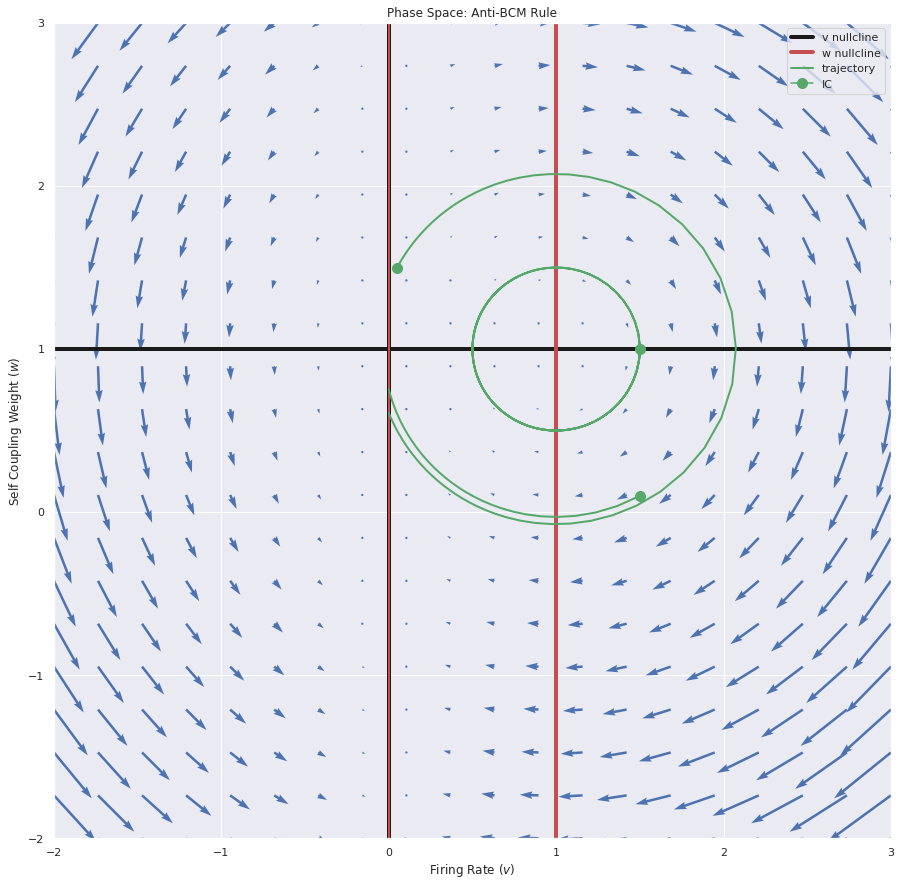

In [6]:
#Plotting
fig, ax = pPlane(vw_system, -2, 3, -2, 3, fsize=(15,15))

ax.plot(tj1[:,0], tj1[:,1], 'g', linewidth=2.0, label='trajectory')
ax.plot(tj2[:,0], tj2[:,1], 'g', linewidth=2.0, label='_nolegend_')
ax.plot(tj3[:,0], tj3[:,1], 'g', linewidth=2.0, label='_nolegend_')

ax.plot(tj1[0,0], tj1[0,1], marker='o', color='g', markersize=10, label='IC')
ax.plot(tj2[0,0], tj2[0,1], marker='o', color='g', markersize=10)
ax.plot(tj3[0,0], tj3[0,1], marker='o', color='g', markersize=10)

ax.set_title('Phase Space: Anti-BCM Rule')
ax.set_xlabel('Firing Rate ($v$)')
ax.set_ylabel('Self Coupling Weight ($w$)')
ax.legend();

Examining the above phase plane plot we can see a number of things. We see our first fixed point $(1,1)$, our line of fixed points $(0,w)$, and three trajectories. The circular trajectory around the point $(1,1)$ clearly illustrates the fact that it is a center. Neurobiologically this indicates ocillations in the firing rate and the self-coupling weight. It shows that the network keeps itself in line by preventing anything from blowing up. This follows from what was discussed earlier that for smaller firing rates $v$, the network can maintain operation (i.e non-zero firing rates). Given the name 'homeostatic' plasticity rule we can interpert these oscillicatory trajectories as the network keeping itself in a realm of homeostasis.  

The two other trajectories serve to elucidate the saddle point for $w>0$ discussed above. In the lower of the two trajectories we see that the solution gets sucked into the fixed line, but the other trajectory is pushed away from this fixed point line. This shows that depending on where the solution starts around this fixed line it can have stable or unstable trajectories.

## Homework 6 Coding Exercises

### Problem 4
Here we train a two layer nerual network in the soft NOT AND function.

In [7]:
#Parameters
l_rates = [0.5, 1, 5, 10, 20] #Learning rates

max_E = 0.05 #Max error
max_I = 10000 #Max iterations

trials = 10 #Number of trials per learning rate, for part b

x_train = [([0,0],0.95), ([1,0],0.95), ([0,1],0.95), ([1,1],0.05)] #Training data triple of (data, tag)

In [8]:
#Defining the Neural Network
class NN():
    def __init__(self, W1, B1, W2, B2, l_rate=0.5):
        self.W1 = W1
        self.B1 = B1
        
        self.W2 = W2
        self.B2 = B2
        
        self.l_rate = l_rate
        
        self.e_vec = [] #Error over time
        self.i_vec = [] #Iteration vector

    def error(self, z, ztarg): #z is expected output, ztarg is real output 
        return (z - ztarg)**2

    def sigmoid(self, x):
        f = 1/(1 + np.exp(-x))

        return f
    
    def sigmoid_d(self, x):
        f = np.exp(-x)/(1 + np.exp(-x))**2
        
        return f
    
    def forward_pass(self, x, test=False):
        Y = self.sigmoid(np.dot(self.W1, x) + self.B1)
        
        z = self.sigmoid(np.dot(self.W2, Y) + self.B2)
        
        if test:
            return (z, Y)
        
        return z

    def train_nn(self):
        #Do learning
        m_Error = np.inf #Max error from four tests
        i = 0

        while max_E<m_Error and i<max_I:
            m_Error = 0
            
            for test, ztarg in x_train:
                z, Y = self.forward_pass(test, test=True)
                
                error = self.error(z, ztarg)
                
                #Check for max error
                if m_Error < error:
                    m_Error = error
                
                #Back Propogate
                #Prep stuff
                dw = np.zeros((2,2))
                dtheta = np.zeros(2)
                dj = np.zeros(2)
                dzeta = 0
                
                sigd_j = self.sigmoid_d(np.dot(self.W2, Y) + self.B2)
                sigd_w1 = self.sigmoid_d(np.dot(self.W1[:1, :], test) + self.B1[0])
                sigd_w2 = self.sigmoid_d(np.dot(self.W1[1:, :], test) + self.B1[1])
                
                Ez = 2*(z-ztarg)
                #######################################################
                #Calculate the derivatives
                
                dj[0] = Ez * Y[0] * sigd_j
                dj[1] = Ez * Y[1] * sigd_j
                
                dzeta = 2*(z - ztarg) * sigd_j
                
                dw[0,0] = Ez * self.W2[0] * sigd_j * test[0] * sigd_w1
                dw[0,1] = Ez * self.W2[0] * sigd_j * test[1] * sigd_w1
                
                dw[1,0] = Ez * self.W2[1] * sigd_j * test[0] * sigd_w2
                dw[1,1] = Ez * self.W2[1] * sigd_j * test[1] * sigd_w2
                
                dtheta[0] = Ez * self.W2[0] * sigd_j * sigd_w1
                dtheta[1] = Ez * self.W2[1] * sigd_j * sigd_w2
                
                #Update weights and biases
                
                self.W1 = self.W1 - self.l_rate * dw
                self.W2 = self.W2 - self.l_rate * dj
                
                self.B1 = self.B1 - self.l_rate * dtheta
                self.B2 = self.B2 - self.l_rate * dzeta
                
                
            #Update e_vec and i_vec
            i += 1
            self.e_vec.append(m_Error)
            self.i_vec.append(i)

### a).

We take the learning rate to be $r=0.5$ and investigate our neural network.

In [9]:
#Initialize weights and biases
W1 = np.random.uniform(-1,1, (2,2))

W2 = np.random.uniform(-1,1, 2)

B1 = np.random.uniform(-1,1, 2)
B2 = np.random.uniform(-1,1)

nn = NN(W1, B1, W2, B2)

#Training
nn.train_nn()

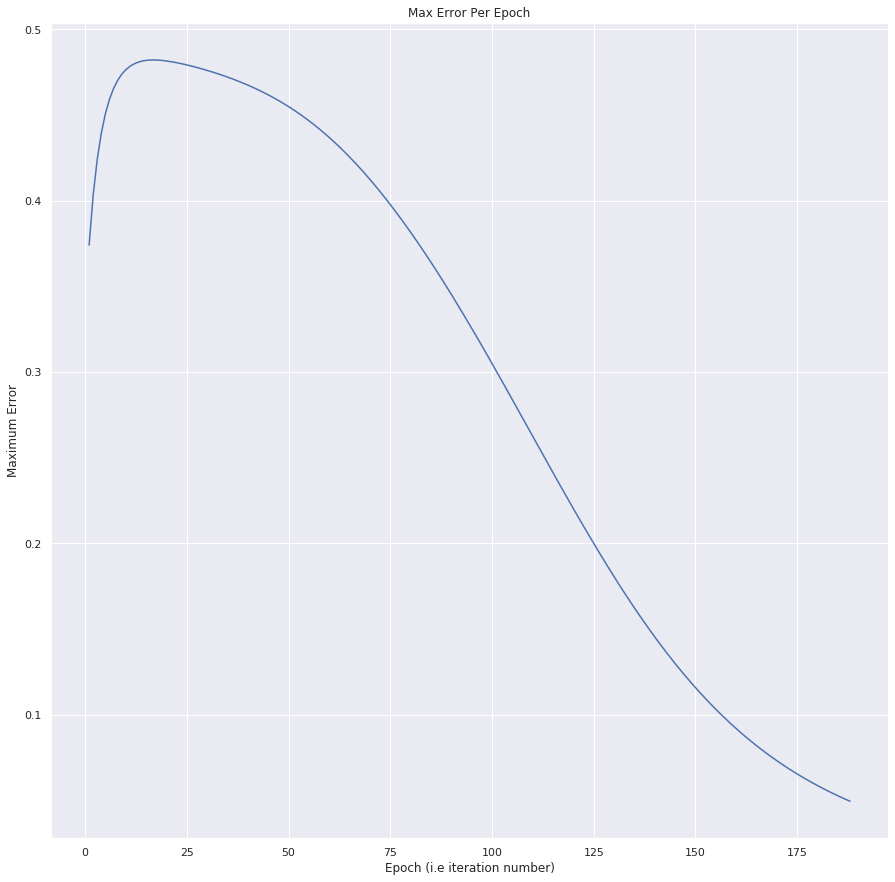

In [10]:
#Testing
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15,15))

ax.plot(nn.i_vec, nn.e_vec)
ax.set_title('Max Error Per Epoch')
ax.set_xlabel('Epoch (i.e iteration number)')
ax.set_ylabel('Maximum Error');

In the plot above we see the maximum error (over all 4 tets) of our network as a function of the iteration. We can notice that at first the error actually increases, before settling into a steady decrease towards our max tolerance error of 0.05 (when the training ends). The reason the error is not always decreasing is because weight modifications that are good for one training example may not be good for all examples. We are back propogating on every example, so in the begining the error may increase as we make changes that may not be globally effective in reducing the maximum error. However, given enough time the modifications will begin to reduce the max error.

### b).

We examine a number of learning rates (i.e $r\in\{0.5, 1, 5, 10, 20\}$), and train a neural network ten times per learning rate. We then determine which learning rate provided the fastest rate of convergance.

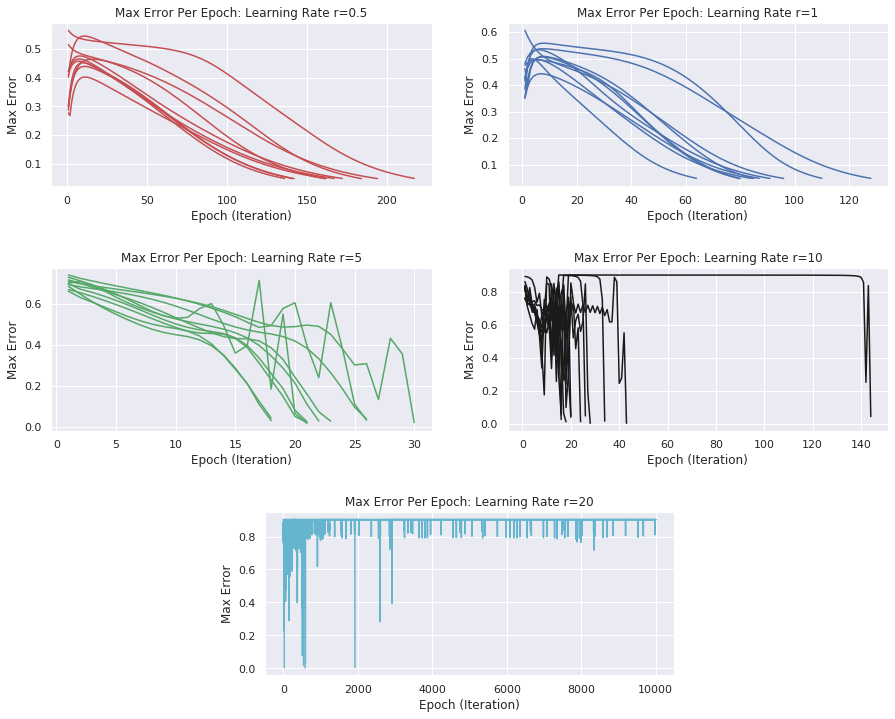

In [11]:
fig = plt.figure(figsize=(15,12))
plt.subplots_adjust(wspace=0.2,hspace=0.5)

conv_iter = []
color = ['r', 'b', 'g', 'k', 'c']

for i in range(len(l_rates)):
    iterations = 0
    
    if i==4:
        ax = plt.subplot2grid((3,8), (int(i/2), 2), colspan=4)
    else:
        ax = plt.subplot2grid((3,2), (int(i/2), int(i%2)))
            
    for j in range(10):
        #Training

        #Init weights and biases
        W1 = np.random.uniform(-1,1, (2,2))

        W2 = np.random.uniform(-1,1, 2)

        B1 = np.random.uniform(-1,1, 2)
        B2 = np.random.uniform(-1,1)
        
        nn = NN(W1, B1, W2, B2, l_rate = l_rates[i])
        nn.train_nn()
        
        iterations += len(nn.i_vec)
            
        ax.plot(nn.i_vec, nn.e_vec, color[i])
        ax.set_title('Max Error Per Epoch: Learning Rate r='+str(l_rates[i]))
        ax.set_xlabel('Epoch (Iteration)')
        ax.set_ylabel('Max Error')
        
    conv_iter.append(iterations/10)
#     plt.tight_layout();

In each of the indiviual plots for different learning rates above we see 10 curves plotted. Each curve is max error per iteration, and it is useful to have multiple instances to get an idea of the average curve as no two training sessions are identical. There are a number of things to discuss about the effect the learning rate has on training. First, we might note the a learning rate of $r=5$ appears to give the fastest rate of convergance. Another thing we might note is that as the learning rate is increased, the curves become less and less smooth. This is most visualized in the plot for $r=10$ where the max errror jumps erratically around. The reason this happens is because with such a large learning rate very large steps are taken down the gradient causing big changes in max error from iteration to iteration. In fact, in the plot for $r=20$ we see that the network never converges. This is becuase the learning rate is so large that it always overshoots any kind of acceptable minimum.

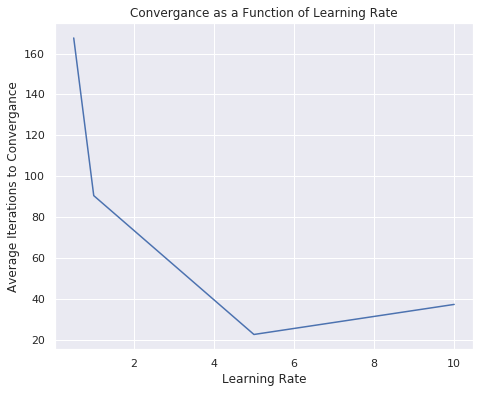

In [12]:
#Plotting convergance
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7.5,6))
ax.plot(l_rates[0:-1], conv_iter[0:-1])
    
ax.set_title('Convergance as a Function of Learning Rate')
ax.set_xlabel('Learning Rate')
ax.set_ylabel('Average Iterations to Convergance');

In the plot above we see the average number of iterations to converge as a function of the learning rate. Notably, $r=20$ has been left out because it never actually converges and would correspond to a vertical asymptote -- although we stop training after 10000 iterations. We can see that our discussion above is further validated, and that $r=5$ indeed has the fastest rate of convergance. A larger learning rate corresponds to larger steps taken along the gradient, so it makes some sense then that the fastest rate of convergance would come from a learning rate that is not to slow or to fast. We could increase the rate of convergance (while keeping a smoot descent) by making the learning rate dependent on the gradient. A step gradient would have a smaller learning rate while a flatter gradient would have a larger learning rate.

### Problem 5
We tweak the model architechtures found at playground.tensorflow.org.

### a).
The default neural network converges on a good solution very quickly -- around 100 epochs in a few trials. However, when the activation is changed to ReLU (Rectified Linear Units) we can see that this convergence is even quicker. In a few test trials it took under 50 epochs to get to a good solution. This is most likely because ReLU is a much easier function to work with computationaly than tanh.

### b).
We modify the network to contain just one hidden layer with three neurons and train it a few times. We can see that the network is not always capable of converging on a solution. Depending on the parameter initialization it may or may not converge to a solution. With only three neurons in a single hidden layer the network may not be capable of converging depening on the initial value of the parameters. The network does not have enough to work with to always find a solution.

### c).
Now we remove one of the neurons to get just two in the hidden layer. Doing this causes the network to be incapable of converging on a good solution. With only two neurons in one hidden layer the network does not have enough parameters (read nuance) to determine a solution.

### d).
Next, we increase the neuron count to eight in the hidden layer. We see that the network converges even faster to a good solution (around 20 epochs). The more neurons in the hidden layer means the network is able to learn more aspects of the training data and converge to a solution faster. Essentially the network is capable of having a more fine grained understanding of an input due to the larger number of parameters.

### e).
Using the spiral dataset we alter the network architechture to include four hidden layers with eight neurons per layer. Training this network for a long time we see that it gets extremely close to a good solution, but falls just a little bit short. Considering the phrase "vanishing gradients" we can explain this situation as being caused by gradients that are near zero. As the network gets closer and closer to a solution the gradients get smaller and smaller. This then causes the updates to the parameters to be smaller, which results in a "stall" in the learning.

### f).
Finally, we examine the effect that the fraction of data used for training has on the network. We use the default network and adjust the ratio of training to test data. Starting at the extremes we see that with a 10% ratio (1 training point for 10 test points) the network takes between 200-400 epochs to converge. Furthermore, once the network converges the test loss is around 0.07 and it takes hundreds of epochs for the test loss to fall below (0.01). However, with a 90% ratio we see that the network converges in about 30 epochs and when it converges there is a test loss of 0.02 and it quickly converges towards zero. A smaller amount of training data means the network has less variance to observe in whatever space it is working on. This can cause overfitting as the network learns just the specifics of the small amount of data. This can cause a large amount of error when new data is introduced. As well, more data means there will be more modifications per epoch which can account for the higher rate of convergance seen in the 90% ratio. Altogether, more data is always better and it is never good to train on all of the data.